# Laboratorio 2 Social Media (Web Scraping)

Iniziamo importando la pagina HTML tramite una URL request

In [90]:
from urllib.request import urlopen as uRequest
uClient = uRequest("https://www.thomann.de/it/modelli_sg.html?ls=25&pg=1")
page_html = uClient.read()
print(page_html[:1000])

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n            "http://www.w3.org/TR/html4/loose.dtd">\n\n<html lang="it" class="no-js">\n<head>\n\n<link rel="preconnect" href="https://fonts.static-thomann.de" crossorigin>\n<link href="https://fonts.static-thomann.de/pics/fonts/open-sans.css?v=1" rel="stylesheet">\n\n<meta name="charset" content="utf-8">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<title>Modelli Double Cut &ndash; Thomann Italia</title>\n\n<meta name="description" content="Pi&ugrave; di {numberOfArticlesInCategory} a partire da {minPrice} in stock - Sul nostro sito trovi sempre lo strumento adatto per te. Spese di spedizione gratuite, 30 giorni &quot;soddisfatto o rimborsato&quot; e 3 anni di garanzia. \nThomann - Il negozio di musica pi&ugrave; grande d\'Europa">\n\n<meta name="Language" content="it-IT">\n<meta name="Content-Language" content="it-IT">\n<meta name="viewport"

Importo beautiful soup per far diventare la pagina un oggetto BeautifulSoup

In [91]:
from bs4 import BeautifulSoup as soup
page_soup = soup(page_html)
print(type(page_soup))

<class 'bs4.BeautifulSoup'>


Cerco tutti i div della classe "fx-product-list-entry". Stamp il tipo di tali oggetti e quanti sono

In [92]:
containers = page_soup.findAll('div',{'class':'fx-product-list-entry'})
print(type(containers), len(containers))

<class 'bs4.element.ResultSet'> 25


Visualizzo il contenuto del primo container

In [93]:
container=containers[0]
print(container)

<div class="fx-product-list-entry">
<div class="product">
<a class="product__image" href="harley_benton_dc_600_vi_vintage_series.htm?listPosition=0&amp;type=category">
<picture class="fx-picture">
<source data-srcset="https://thumbs.static-thomann.de/thumb//thumb220x220/pics/prod/362649.webp" srcset="" type="image/webp"> <source data-srcset="https://thumbs.static-thomann.de/thumb//thumb220x220/pics/prod/362649.jpg" srcset=""> <img alt="Harley Benton DC-600 VI Vintage Series" class="fx-image responsive-image product-image lazyload loaded" data-src="" height=" 220" src="https://images.static-thomann.de/pics/images/misc/placeholder.svg" width=" 220"/>
</source></source></picture>
</a>
<a class="product__content" href="harley_benton_dc_600_vi_vintage_series.htm?listPosition=0&amp;type=category">
<div class="product__details">
<div class="product__title fx-text">
<span class="title__manufacturer">Harley Benton</span>
<span class="title__name">DC-600 VI Vintage Series</span>
</div>
<div clas

### Estraggo il Manufacturer dal primo container

In [166]:
manufacturer = container.findAll('span',{'class':'title__manufacturer'})[0].text
print(manufacturer)

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

### Estraggo il Modello dal primo container

In [95]:
model = container.findAll('span',{'class':'title__name'})[0].text
print(model)

DC-600 VI Vintage Series


### Estraggo l'immagine dal primo container

In [96]:
container.findAll('a',{'class':'product__image'})[0]

<a class="product__image" href="harley_benton_dc_600_vi_vintage_series.htm?listPosition=0&amp;type=category">
<picture class="fx-picture">
<source data-srcset="https://thumbs.static-thomann.de/thumb//thumb220x220/pics/prod/362649.webp" srcset="" type="image/webp"> <source data-srcset="https://thumbs.static-thomann.de/thumb//thumb220x220/pics/prod/362649.jpg" srcset=""> <img alt="Harley Benton DC-600 VI Vintage Series" class="fx-image responsive-image product-image lazyload loaded" data-src="" height=" 220" src="https://images.static-thomann.de/pics/images/misc/placeholder.svg" width=" 220"/>
</source></source></picture>
</a>

In [97]:
img_url = container.findAll('a',{'class':'product__image'})[0].picture.source.source['data-srcset']
print(img_url)

https://thumbs.static-thomann.de/thumb//thumb220x220/pics/prod/362649.jpg


Cerco l'URL della pagina del singolo prodotto in modo da prendere l'immagine in alta risoluzione

In [148]:
img_url_hr = "https://www.thomann.de/it/" + container.findAll('a',{'class':'product__image'})[0]["href"]
print(img_url_hr)

https://www.thomann.de/it/harley_benton_dc_600_vi_vintage_series.htm?listPosition=0&type=category


In [155]:
uClinet2 = uRequest(img_url_hr)
product_html_page = uClinet2.read()
p_page_soup = soup(product_html_page)
hr_img = p_page_soup.find_all('img', {'class' : 'spotlight__item-image'})[0]['src']

https://th.static-thomann.de/thumb/padthumb600x600/pics/bdb/362649/14683331_800.jpg


In [157]:
def getHighResImg():
    img_url = container.findAll('a',{'class':'product__image'})[0].picture.source.source['data-srcset']
    img_url_hr = "https://www.thomann.de/it/" + container.findAll('a',{'class':'product__image'})[0]["href"]
    uClinet2 = uRequest(img_url_hr)
    product_html_page = uClinet2.read()
    p_page_soup = soup(product_html_page)
    hr_img = p_page_soup.find_all('img', {'class' : 'spotlight__item-image'})[0]['src']
    return hr_img
    

Visualizzo l'immagine

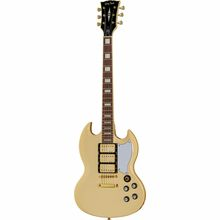

In [98]:
import IPython
IPython.display.Image(img_url)

### Estraggo il prezzo

In [99]:
price = container.findAll('span',{'class':'product__price-primary'})[0].text
print(price)

            € 211
    


Converto la stringa del prezzo in un numero

In [100]:
import re
price = float(re.search("[0-9]+,?[0-9]*",price).group())
print(price)

211.0


### Estraggo numero di recensioni e disponibilità

In [101]:
review_count = int(container.findAll('div',{'class':'fx-rating-stars__description'})[0].text)
availability = container.findAll('div',{'class':'product__availability'})[0].text.strip()
print(review_count, availability)

130 disponibile


### Estraggo il rating

In [102]:
container.findAll('div',{'class':'fx-rating-stars__filler'})

[<div class="fx-rating-stars__filler" style="width: 90%">
 <svg class="fx-icon fx-icon-star-fill fx-rating-stars__filler-icon product__rating-star">
 <use xlink:href="/static/icons/fxicons.svg?v=9952#star-fill"></use>
 </svg> <svg class="fx-icon fx-icon-star-fill fx-rating-stars__filler-icon product__rating-star">
 <use xlink:href="/static/icons/fxicons.svg?v=9952#star-fill"></use>
 </svg> <svg class="fx-icon fx-icon-star-fill fx-rating-stars__filler-icon product__rating-star">
 <use xlink:href="/static/icons/fxicons.svg?v=9952#star-fill"></use>
 </svg> <svg class="fx-icon fx-icon-star-fill fx-rating-stars__filler-icon product__rating-star">
 <use xlink:href="/static/icons/fxicons.svg?v=9952#star-fill"></use>
 </svg> <svg class="fx-icon fx-icon-star-fill fx-rating-stars__filler-icon product__rating-star">
 <use xlink:href="/static/icons/fxicons.svg?v=9952#star-fill"></use>
 </svg> </div>]

In [103]:
rating = container.findAll('div',{'class':'fx-rating-stars__filler'})[0]['style']
print(rating)

width: 90%


Convertiamo in numero tale stringa

In [104]:
rating = float(rating.replace('width: ','').replace('%',''))
print(rating)

90.0


## Automatizziamo questo processo per tutti i container nella pagina

In [158]:
def scrape_page(page_url, _records = None):
    if _records is None:
        _records = []
    page_html=uRequest(page_url).read()
    page_soup=soup(page_html)
    containers=page_soup.findAll('div',{'class':'fx-product-list-entry'})
    for container in containers:
        manufacturer = container.findAll('span',{'class':'title__manufacturer'})[0].text
        model = container.findAll('span',{'class':'title__name'})[0].text
        #img_url = container.findAll('a',{'class':'product__image'})[0].picture.source.source['data-srcset']	
        img_url = getHighResImg()
        price = container.findAll('span',{'class':'product__price-primary'})[0].text
        price = float(price.replace('€','').replace(',','.'))
        try:
            review_count = int(container.findAll('div',{'class':'fx-rating-stars__description'})[0].text)
        except:
            review_count = 0
        availability = container.findAll('div',{'class':'product__availability'})[0].text.strip()
        try:
            rating = container.findAll('div',{'class':'fx-rating-stars__filler'})[0]['style']
            rating = float(re.search('[0-9]+(\.[0-9]+)?', rating).group())
        except:
            rating=0
        _records.append([manufacturer, model, img_url, price, review_count, availability, rating])
    return _records

Eseguiamo e inseriamo il risultato in un dataframe

In [159]:
import pandas as pd
page_url = 'https://www.thomann.de/it/modelli_sg.html?ls=25&pg=1'
records = scrape_page(page_url)
data = pd.DataFrame(records, columns=['manufacturer','model','img_url','price','review_count','availability','rating'])


In [160]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  25 non-null     object 
 1   model         25 non-null     object 
 2   img_url       25 non-null     object 
 3   price         25 non-null     float64
 4   review_count  25 non-null     int64  
 5   availability  25 non-null     object 
 6   rating        25 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.5+ KB
None


,manufacturer,model,img_url,price,review_count,availability,rating
0,Harley Benton,DC-600 VI Vintage Series,https://th.static-thomann.de/thumb/padthumb600...,211.0,130,disponibile,90.0
1,Harley Benton,DC-580 CH Vintage Series,https://th.static-thomann.de/thumb/padthumb600...,139.0,224,Disponibile a breve (normalmente 2-5 giorni),92.0
2,Epiphone,Tony Iommi SG Special w/case,https://th.static-thomann.de/thumb/padthumb600...,990.0,1,disponibile,80.0
3,Harley Benton,Electric Guitar Kit DC Style,https://th.static-thomann.de/thumb/padthumb600...,99.0,615,disponibile,82.0
4,Epiphone,SG Standard '61 Vintage Cherry,https://th.static-thomann.de/thumb/padthumb600...,444.0,16,disponibile,96.0


### Salviamo le immagini in una cartella

Creiamo la cartella

In [108]:
import os
dest_dir = 'thomann_img'
os.makedirs(dest_dir, exist_ok=True)

Definiamo il nome del file in base all'ID  della riga nel dataframe

In [109]:
row = data.iloc[0]
row

manufacturer                                        Harley Benton
model                                    DC-600 VI Vintage Series
img_url         https://thumbs.static-thomann.de/thumb//thumb2...
price                                                       211.0
review_count                                                  130
availability                                          disponibile
rating                                                       90.0
Name: 0, dtype: object

Definisco il formato del nome del file

In [110]:
fname = "img_{id:05d}.{ext:s}"

Definisco la variabile ext(estensione)

In [161]:
ext=re.search('[^.]+$', row['img_url']).group()
print(ext)

jpg


Formatto quindi la stringa precedentemente definita

In [162]:
fname.format(id=int(row.name),ext=ext)

'img_00000.jpg'

Ottengo il percorso completo del file

In [163]:
from os.path import join
fullpath = join(dest_dir,fname.format(id=int(row.name),ext=ext))
fullpath

'thomann_img/img_00000.jpg'

Scarico il file mediante urllib

In [164]:
from urllib.request import urlretrieve as retrieve
retrieve(row['img_url'], fullpath)

('thomann_img/img_00000.jpg', <http.client.HTTPMessage at 0x7fc2c1a2af40>)

### Automatizzazione del download delle immagini

Definisco una funzione e aggiungo un campo img_path al dataframe

In [115]:
def download_images(data, dest_dir, fname="img_{id:05d}.{ext:s}"):
    data = data.copy() #preserva il dataframe originale
    img_paths = []
    data['img_path'] = None #crea una nuova colonna
    for i, row in data.iterrows():
        ext = re.search('[^.]+$',row['img_url']).group()
        fullpath = join(dest_dir,fname.format(id=int(row.name),ext=ext))
        retrieve(row['img_url'], fullpath)
        img_paths.append(fullpath)
        
    data['img_path']=img_paths
    return data

Utilizzo la funzione per scaricare le immagini

In [165]:
data2 = download_images(data, "thomann_img")

Visualizzo il nuovo dataframe

In [117]:
data2.head()

,manufacturer,model,img_url,price,review_count,availability,rating,img_path
0,Harley Benton,DC-600 VI Vintage Series,https://thumbs.static-thomann.de/thumb//thumb2...,211.0,130,disponibile,90.0,thomann_img/img_00000.jpg
1,Harley Benton,DC-580 CH Vintage Series,https://thumbs.static-thomann.de/thumb//thumb2...,139.0,224,Disponibile a breve (normalmente 2-5 giorni),92.0,thomann_img/img_00001.jpg
2,Epiphone,Tony Iommi SG Special w/case,https://thumbs.static-thomann.de/thumb//thumb2...,990.0,1,disponibile,80.0,thomann_img/img_00002.jpg
3,Harley Benton,Electric Guitar Kit DC Style,https://thumbs.static-thomann.de/thumb//thumb2...,99.0,615,disponibile,82.0,thomann_img/img_00003.jpg
4,Epiphone,SG Standard '61 Vintage Cherry,https://thumbs.static-thomann.de/thumb//thumb2...,444.0,16,disponibile,96.0,thomann_img/img_00004.jpg


## Navigare tra le pagine

Notiamo che le pagine seguono la struttura "https://www.thomann.de/it/modelli_sg.html?ls=25&pg=1" avente ls=x & pg=y alla fine. Sfruttiamo ciò per navigare fra le pagine. Inoltre nel caso inserissimo un numero di pagina inesistente viene visualizzata una pagina bianca.

Isoliamo pagina e dominio tramite un espressione regolare:

In [121]:
print(page_url)

https://www.thomann.de/it/modelli_sg.html?ls=25&pg=1


In [125]:
base_url = re.search('http(s)?://[^/]*/[^?]*',page_url).group(0)
print(base_url)

https://www.thomann.de/it/modelli_sg.html


Scriviamo quindi il formato delle pagine come segue:

In [126]:
p = 1
f"{base_url}?ls=25&pg={p:d}"

'https://www.thomann.de/it/modelli_sg.html?ls=25&pg=1'

### Includiamo nello script di scraping la navigazione nelle pagine

In [129]:
def navigate_and_scrape(base_url, records = None):
    if records is None:
        records = []
    
    all_records = records
    page = 1 #iniziamo dalla pagina 1
    while(True and page <= 5):
        url = f"{base_url}?pg={page:d}&ls=25"
        records = scrape_page(url)
        all_records.extend(records)
        if len(records)==0: #usciamo quando la pagina non contiene più record
            break
        page+=1
    
    return all_records

Eseguiamo la funzione per effettuare lo scraping

In [130]:
records = navigate_and_scrape(page_url)
data = pd.DataFrame(records, columns=['manufacturer','model','img_url','price','review_count','availability','rating'])

Visualizziamo quanto ottenuto dallo scraping con navigazione

In [131]:
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  125 non-null    object 
 1   model         125 non-null    object 
 2   img_url       125 non-null    object 
 3   price         125 non-null    float64
 4   review_count  125 non-null    int64  
 5   availability  125 non-null    object 
 6   rating        125 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.0+ KB
None


,manufacturer,model,img_url,price,review_count,availability,rating
0,Harley Benton,DC-600 VI Vintage Series,https://th.static-thomann.de/thumb//thumb220x2...,211.0,130,disponibile,90.0
1,Harley Benton,DC-580 CH Vintage Series,https://th.static-thomann.de/thumb//thumb220x2...,139.0,224,Disponibile a breve (normalmente 2-5 giorni),92.0
2,Epiphone,Tony Iommi SG Special w/case,https://th.static-thomann.de/thumb//thumb220x2...,990.0,1,disponibile,80.0
3,Harley Benton,Electric Guitar Kit DC Style,https://th.static-thomann.de/thumb//thumb220x2...,99.0,615,disponibile,82.0
4,Epiphone,SG Standard '61 Vintage Cherry,https://th.static-thomann.de/thumb//thumb220x2...,444.0,16,disponibile,96.0
5,Epiphone,Prophecy SG Blue Tiger,https://th.static-thomann.de/thumb//thumb220x2...,698.0,4,disponibile,100.0
6,Harley Benton,DC-DLX Gotoh Pelham Blue,https://th.static-thomann.de/thumb//thumb220x2...,244.0,30,disponibile,94.0
7,Harley Benton,DC-200 CH Student Series,https://th.static-thomann.de/thumb//thumb220x2...,99.0,108,Disponibile a breve (normalmente 2-5 giorni),90.0
8,Harley Benton,CST-24T Emerald Flame,https://th.static-thomann.de/thumb//thumb220x2...,269.0,145,disponibile,94.0
9,Harley Benton,DC-Junior TV Yellow,https://th.static-thomann.de/thumb//thumb220x2...,199.0,181,Disponibile a breve (normalmente 2-5 giorni),92.0


# Analisi dei dati prelevati

Vediamo delle statistiche quantitative sui dati appena estratti

In [132]:
data.describe()

,price,review_count,rating
count,125.000000,125.000000,125.000000
mean,383.490200,71.520000,88.800000
std,337.626626,126.556796,18.837163
min,1.099000,0.000000,0.000000
25%,99.000000,7.000000,90.000000
50%,249.000000,23.000000,94.000000
75%,575.000000,69.000000,96.000000
max,999.000000,615.000000,100.000000


Vediamo adesso quanti prodotti ci sono di ogni marca

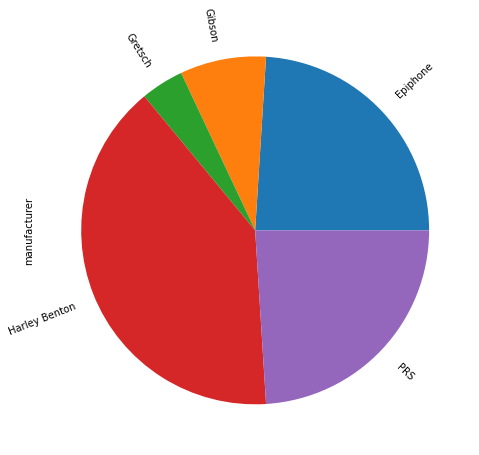

In [133]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
data.groupby('manufacturer')['manufacturer'].count().plot.pie(rotatelabels=True)
plt.show()

Calcoliamo ora il prezzo medio per ogni marca

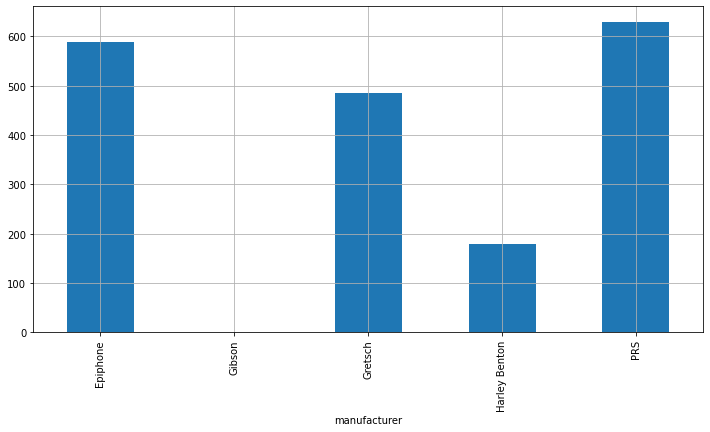

In [134]:
plt.figure(figsize=(12,6))
data.groupby('manufacturer')['price'].mean().plot.bar()
plt.grid()
plt.show()

Vediamo ora quali sono le marche più popolari analizzando il numero di review

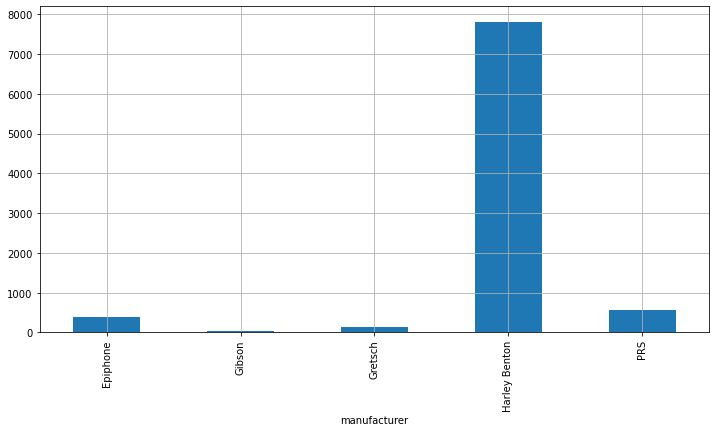

In [135]:
plt.figure(figsize=(12,6))
data.groupby('manufacturer')['review_count'].sum().plot.bar()
plt.grid()
plt.show()

Vediamo adesso il rating medio degli oggetti di ogni marca

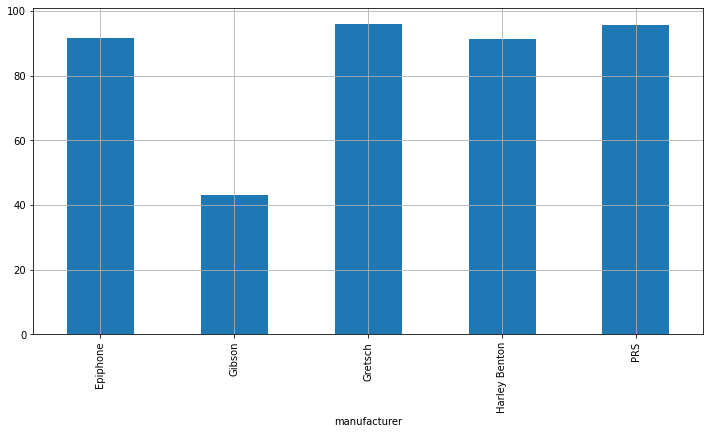

In [136]:
plt.figure(figsize=(12,6))
data.groupby('manufacturer')['rating'].mean().plot.bar()
plt.grid()
plt.show()